# **TimeSeries Ekstraksi Fitur Audio**
Dataset menggunakan data voice 100 buka dan 100 tutup dengan format .wav yang di rekam sendiri

In [41]:
pip install tsfel librosa pandas scikit-learn



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
import tsfel
import librosa
import numpy as np
import pandas as pd
import os


In [43]:
import os

# Langsung akses folder di dalam direktori saat ini
path_buka = 'buka_wav'
path_tutup = 'tutup_wav'

# Cek apakah folder terbaca
print("Isi folder buka_wav:", os.listdir(path_buka)[:5])
print("Isi folder tutup_wav:", os.listdir(path_tutup)[:5])


Isi folder buka_wav: ['buka (32).wav', 'buka (14).wav', 'buka (92).wav', 'buka (71).wav', 'buka (42).wav']
Isi folder tutup_wav: ['tutup (67).wav', 'tutup (62).wav', 'tutup (92).wav', 'tutup (25).wav', 'tutup (87).wav']


## **Ekstraksi fitur domain statistical**

In [44]:
# Ambil konfigurasi fitur domain "statistical"
cfg = tsfel.get_features_by_domain('statistical')

def extract_tsfel_features():
    features = []
    labels = []

    # Loop untuk dua kelas
    for label in ['buka_wav', 'tutup_wav']:
        folder_path = label  # karena folder ada di direktori yang sama
        print(f"🔍 Memproses folder: {label} ...")

        for file in os.listdir(folder_path):
            if file.endswith('.wav'):
                file_path = os.path.join(folder_path, file)

                try:
                    # Load file audio
                    y, sr = librosa.load(file_path, sr=None)

                    # Ekstraksi fitur TSFEL
                    df_feat = tsfel.time_series_features_extractor(cfg, y, fs=sr, verbose=0)

                    # Ambil rata-rata setiap kolom fitur (supaya 1 baris per file)
                    feat_mean = df_feat.mean().values
                    features.append(feat_mean)
                    labels.append(label.replace('_wav', ''))  # hilangkan _wav

                except Exception as e:
                    print(f"⚠️ Gagal memproses {file_path}: {e}")

    # Gabungkan hasil ke DataFrame
    X = pd.DataFrame(features, columns=df_feat.columns)
    y = pd.Series(labels, name='label')
    return X, y


# Jalankan fungsi
X, y = extract_tsfel_features()

print("Jumlah data:", len(X))
print("Jumlah fitur:", X.shape[1])
print("Label unik:", y.unique())
X.head()


🔍 Memproses folder: buka_wav ...
🔍 Memproses folder: tutup_wav ...
Jumlah data: 200
Jumlah fitur: 31
Label unik: ['buka' 'tutup']


,0_Absolute energy,0_Average power,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,0_ECDF_2,0_ECDF_3,...,0_Mean,0_Mean absolute deviation,0_Median,0_Median absolute deviation,0_Min,0_Peak to peak distance,0_Root mean square,0_Skewness,0_Standard deviation,0_Variance
0,466.560301,192.477026,23270.0,93081.0,-0.000275,0.000275,0.000009,0.000017,0.000026,0.000034,...,0.000011,0.023953,0.0,0.000153,-0.551025,1.119568,0.063324,0.137023,0.063324,0.004010
1,579.632037,335.439251,16588.0,66355.0,-0.003571,0.003326,0.000012,0.000024,0.000036,0.000048,...,-0.000030,0.035708,0.0,0.001617,-0.712250,1.363739,0.083596,0.006383,0.083596,0.006988
2,577.444659,381.913106,0.0,0.0,0.000000,0.000000,0.000014,0.000028,0.000041,0.000055,...,-0.000004,0.039157,0.0,0.008453,-0.933563,1.739197,0.089199,-0.178687,0.089199,0.007956
3,354.869821,205.366955,16588.0,66355.0,-0.006287,0.006348,0.000012,0.000024,0.000036,0.000048,...,-0.000008,0.027675,0.0,0.003723,-0.518646,0.976196,0.065410,-0.286593,0.065410,0.004278
4,871.198669,684.915832,12211.0,48844.0,-0.019623,0.019043,0.000016,0.000033,0.000049,0.000066,...,-0.000006,0.057693,0.0,0.011322,-0.760010,1.435883,0.119452,-0.049095,0.119452,0.014269


In [45]:
X['label'] = y
X.to_csv("fitur_tsfel_statistical.csv", index=False)
print("✅ Fitur berhasil disimpan di folder 'tugas' (tempat notebook ini berada)")


✅ Fitur berhasil disimpan di folder 'tugas' (tempat notebook ini berada)


## **Prepocessing Data**

In [46]:
# Load dataset
df = pd.read_csv("fitur_tsfel_statistical.csv")
print("✅ Data berhasil dimuat!")
print("Ukuran data:", df.shape)
df.head()


✅ Data berhasil dimuat!
Ukuran data: (200, 32)


,0_Absolute energy,0_Average power,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,0_ECDF_2,0_ECDF_3,...,0_Mean absolute deviation,0_Median,0_Median absolute deviation,0_Min,0_Peak to peak distance,0_Root mean square,0_Skewness,0_Standard deviation,0_Variance,label
0,466.560301,192.477026,23270.0,93081.0,-0.000275,0.000275,0.000009,0.000017,0.000026,0.000034,...,0.023953,0.0,0.000153,-0.551025,1.119568,0.063324,0.137023,0.063324,0.004010,buka
1,579.632037,335.439251,16588.0,66355.0,-0.003571,0.003326,0.000012,0.000024,0.000036,0.000048,...,0.035708,0.0,0.001617,-0.712250,1.363739,0.083596,0.006383,0.083596,0.006988,buka
2,577.444659,381.913106,0.0,0.0,0.000000,0.000000,0.000014,0.000028,0.000041,0.000055,...,0.039157,0.0,0.008453,-0.933563,1.739197,0.089199,-0.178687,0.089199,0.007956,buka
3,354.869821,205.366955,16588.0,66355.0,-0.006287,0.006348,0.000012,0.000024,0.000036,0.000048,...,0.027675,0.0,0.003723,-0.518646,0.976196,0.065410,-0.286593,0.065410,0.004278,buka
4,871.198669,684.915832,12211.0,48844.0,-0.019623,0.019043,0.000016,0.000033,0.000049,0.000066,...,0.057693,0.0,0.011322,-0.760010,1.435883,0.119452,-0.049095,0.119452,0.014269,buka


In [47]:
# Pisahkan fitur dan label
X = df.drop('label', axis=1)
y = df['label']

print("Jumlah data:", len(X))
print("Jumlah fitur:", X.shape[1])
print("Label unik:", y.unique())
print(y.value_counts())

Jumlah data: 200
Jumlah fitur: 31
Label unik: ['buka' 'tutup']
label
buka     100
tutup    100
Name: count, dtype: int64


### **Cek Missing Value**

In [48]:
# cek missing value
print("Jumlah missing value:", X.isna().sum().sum())

# Jika ada NaN atau inf, ganti dengan 0
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)


Jumlah missing value: 0


### **Deteksi Outlier dengan LoF**

In [49]:
from sklearn.neighbors import LocalOutlierFactor

# Inisialisasi LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Fit dan prediksi (-1 = outlier, 1 = normal)
y_pred_outlier = lof.fit_predict(X)

# Ambil data yang normal saja
mask_normal = y_pred_outlier == 1
X_lof = X[mask_normal]
y_lof = y[mask_normal]

print(f"Jumlah data awal: {len(X)}")
print(f"Jumlah data setelah buang outlier (LOF): {len(X_lof)}")
print(f"Outlier terdeteksi: {np.sum(y_pred_outlier == -1)} baris")


Jumlah data awal: 200
Jumlah data setelah buang outlier (LOF): 190
Outlier terdeteksi: 10 baris


### **Normalisasi**

In [50]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lof)

# Simpan scaler di folder tugas (tempat notebook ini berada)
joblib.dump(scaler, 'scaler_tsfel.pkl')
print("✅ Scaler disimpan")


✅ Scaler disimpan


In [51]:
# Gabungkan kembali jadi DataFrame agar mudah dipakai nanti
X_clean = pd.DataFrame(X_scaled, columns=X_lof.columns)
X_clean['label'] = y_lof.values


### **Visualisasi Data**

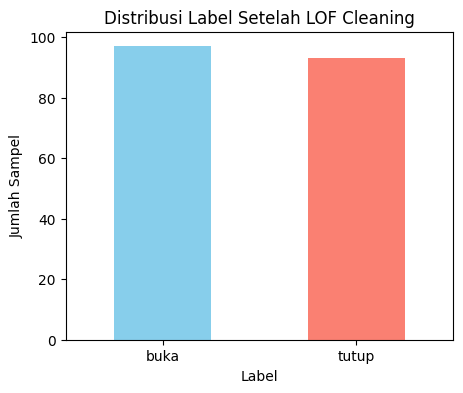

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
y_lof.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Label Setelah LOF Cleaning')
plt.xlabel('Label')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()


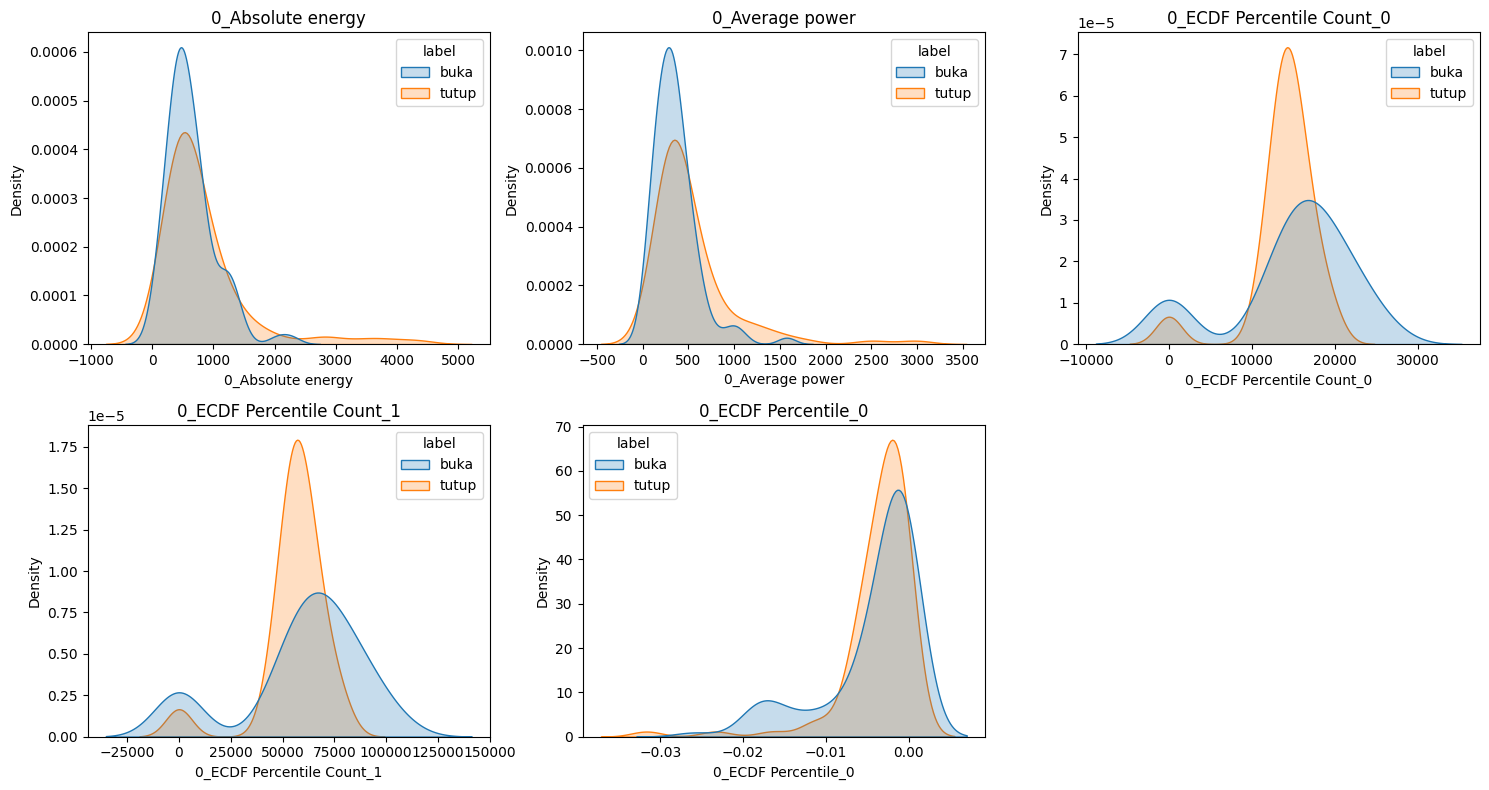

In [53]:
import seaborn as sns
import pandas as pd

# Buat dataframe gabungan
df_clean = X_lof.copy()
df_clean['label'] = y_lof.values

# Pilih 5 fitur acak untuk ditampilkan
sample_features = df_clean.columns[:5]

plt.figure(figsize=(15,8))
for i, col in enumerate(sample_features, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=df_clean, x=col, hue='label', fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()


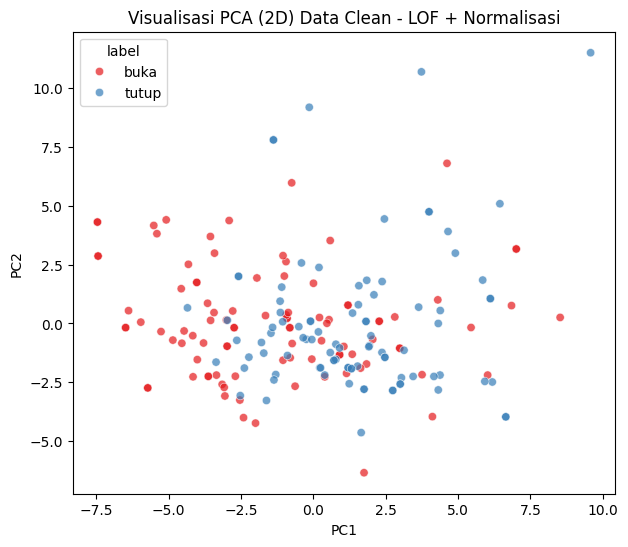

In [54]:
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2 komponen utama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Buat dataframe untuk visualisasi
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y_lof.values

# Plot hasil PCA
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', palette='Set1', alpha=0.7)
plt.title('Visualisasi PCA (2D) Data Clean - LOF + Normalisasi')
plt.show()


## **Modelling menggunakan RandomForest**

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_lof, test_size=0.2, random_state=42, stratify=y_lof
)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))


Jumlah data training: 152
Jumlah data testing: 38


=== Random Forest ===
Akurasi: 0.8947368421052632
              precision    recall  f1-score   support

        buka       0.86      0.95      0.90        19
       tutup       0.94      0.84      0.89        19

    accuracy                           0.89        38
   macro avg       0.90      0.89      0.89        38
weighted avg       0.90      0.89      0.89        38



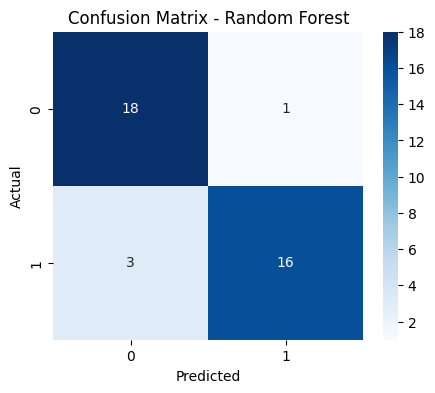

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi dan latih model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf.predict(X_test)

# Evaluasi
print("=== Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [57]:
# Simpan
joblib.dump(rf, 'model_randomforest_tsfel.pkl')

print("✅ Model RandomForest disimpan ke Drive!")


✅ Model RandomForest disimpan ke Drive!


### **Link file csv dam Streamlit**
file csv: https://drive.google.com/file/d/14nemABXyokGlunYf5LYLq5DoUBAc6V8X/view?usp=sharing

Streamlit: https://voice-command-buka-tutup-bnmvmm5hxmaharxwrf9jmm.streamlit.app/